In [1]:
## ----setup, include=FALSE-------------------------------------------------
knitr::opts_chunk$set(echo = T, warning = F, message = F)
library(dplyr)
library(tidyverse)
library(gt)
library(ggplot2)
library(raster)
library(sp)
library(sf)
library(spData)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ tidyr   1.2.0     ✔ forcats 0.5.2
✔ readr   2.1.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: sp


Attaching package: 'raster'


The following object is masked from 'package:dplyr':

    select


Linking to GEOS 3.9.1, GDAL 3.4.3, PROJ 7.2.1; sf_use_s2() is TRUE

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`



In [2]:
data(world) 
tmax_monthly <- getData(name = "worldclim", var="tmax", res=10)

Warning message in getData(name = "worldclim", var = "tmax", res = 10):
"getData will be removed in a future version of raster
. Please use the geodata package instead"


In [3]:
sp_world <- world %>% 
  filter(continent != "Antarctica") %>% 
  as(.,"Spatial")

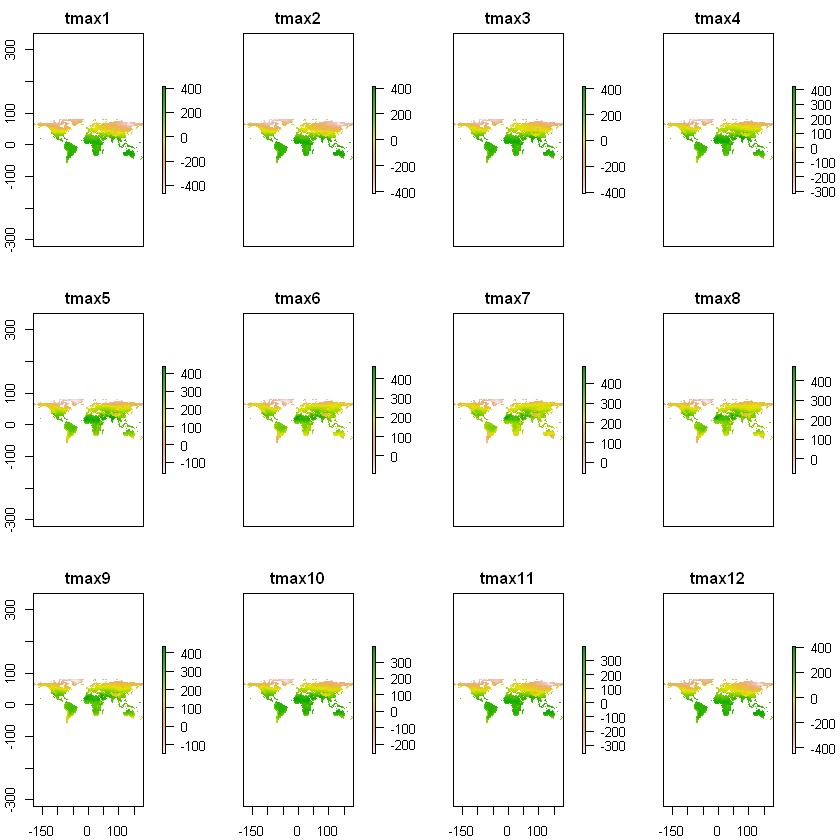

In [4]:
plot(tmax_monthly) 

In [5]:
gain(tmax_monthly) <- 1/10
tmax_annual <- max(tmax_monthly)
names(tmax_annual) <- "tmax"

In [6]:
tmax_country <- raster::extract(tmax_annual, sp_world, fun = max, na.rm = T, small = T, sp = T) %>%st_as_sf()

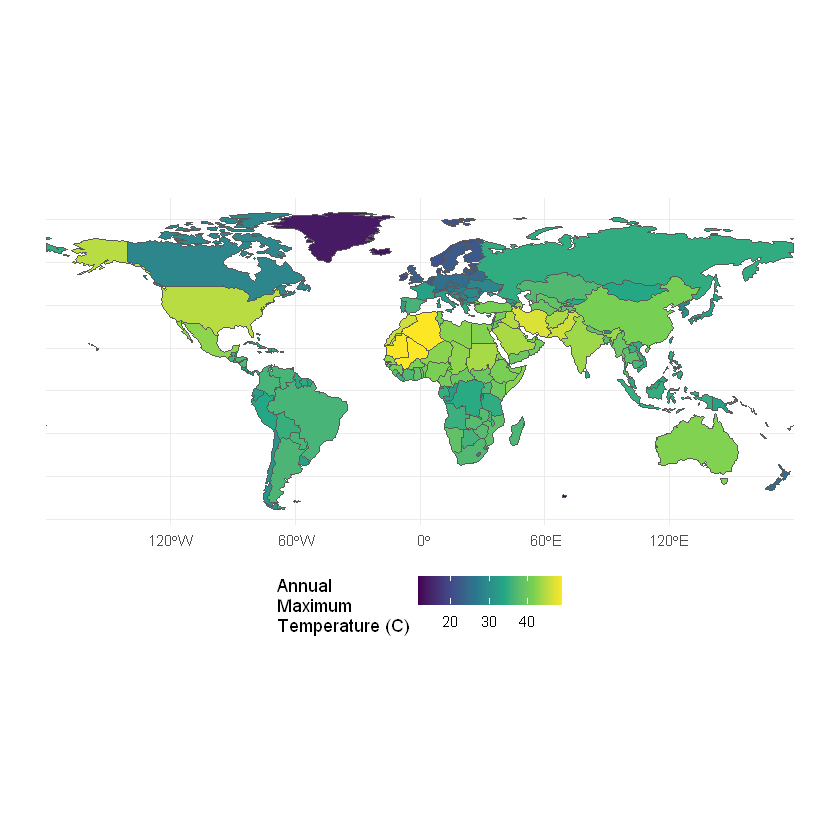

In [7]:
ggplot(tmax_country) +
  geom_sf(aes(fill = tmax)) + 
  scale_fill_viridis_c(name="Annual\nMaximum\nTemperature (C)") + 
  theme_minimal() + 
  theme(legend.position = 'bottom')

In [8]:
tmax_country %>%
  st_set_geometry(NULL) %>%
  group_by(continent) %>%
  dplyr::select(continent, name_long, tmax) %>%
  top_n(1) %>%
  ungroup() %>%
  gt() %>%
  cols_label(
    continent = "Continent",
    name_long = "Country",
    tmax = "Maximum Temperature (C)"
  ) %>%
  tab_header(
    title = "The hottest country in each continent",
  ) %>%
  tab_source_note(
    source_note = "Source: WorldClim"
  )

Selecting by tmax


<div id="ozkbyviwdk" style="overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  <style>html {
  font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Oxygen, Ubuntu, Cantarell, 'Helvetica Neue', 'Fira Sans', 'Droid Sans', Arial, sans-serif;
}

#ozkbyviwdk .gt_table {
  display: table;
  border-collapse: collapse;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#ozkbyviwdk .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#ozkbyviwdk .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#ozkbyviwdk .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 0;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#ozkbyviwdk .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#ozkbyviwdk .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#ozkbyviwdk .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#ozkbyviwdk .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#ozkbyviwdk .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#ozkbyviwdk .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#ozkbyviwdk .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#ozkbyviwdk .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
}

#ozkbyviwdk .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-col